In [394]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.pipeline import Pipeline
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn import linear_model 
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn. preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.cluster import KMeans
from sklearn.datasets import load_wine
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_digits

In [395]:

digits = load_digits()
digits.keys()


dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

2


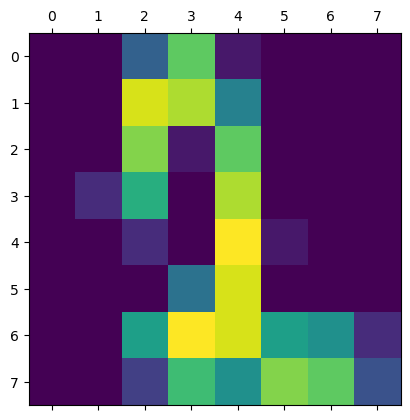

In [396]:
digits.images
plt.matshow(digits.data[12].reshape(8,8))
print(digits.target[12])

In [397]:
np.unique(digits.target)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [398]:
df = pd.DataFrame(digits.data,columns = digits.feature_names)
df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [399]:
X = df
Y = digits.target

In [400]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [401]:

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size =0.2)

In [402]:
model = LogisticRegression()
model.fit(X_train, Y_train)
model.score(X_test, Y_test)

c:\Users\adria\miniconda3\envs\myenv\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9694444444444444

In [403]:
from sklearn.decomposition import PCA
pca = PCA(0.95)
X_pca = pca.fit_transform(X)
X.shape
X_pca.shape #zabieramy niepotrzebne i zbedne komorki

(1797, 29)

In [404]:
X_train, X_test, Y_train, Y_test = train_test_split(X_pca,Y,test_size =0.2)


In [405]:
model = LogisticRegression(max_iter=100)
model.fit(X_train, Y_train)
model.score(X_test, Y_test)

c:\Users\adria\miniconda3\envs\myenv\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9472222222222222

In [406]:
score_without_pca = np.average(cross_val_score(LogisticRegression(max_iter=100),X, Y))
score_with_pca = np.average(cross_val_score(LogisticRegression(max_iter=100),X_pca, Y))
print(score_without_pca,score_with_pca)

c:\Users\adria\miniconda3\envs\myenv\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\adria\miniconda3\envs\myenv\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logis

0.9137650882079852 0.9076415970287837


c:\Users\adria\miniconda3\envs\myenv\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [407]:
pca.explained_variance_ratio_


array([0.14890594, 0.13618771, 0.11794594, 0.08409979, 0.05782415,
       0.0491691 , 0.04315987, 0.03661373, 0.03353248, 0.03078806,
       0.02372341, 0.02272697, 0.01821863, 0.01773855, 0.01467101,
       0.01409716, 0.01318589, 0.01248138, 0.01017718, 0.00905617,
       0.00889538, 0.00797123, 0.00767493, 0.00722904, 0.00695889,
       0.00596081, 0.00575615, 0.00515158, 0.0048954 ])

In [408]:
pca = PCA(n_components=22)
X_pca = pca.fit_transform(X)
X_pca.shape

(1797, 22)

In [409]:
X_train, X_test, Y_train, Y_test = train_test_split(X_pca,Y,test_size =0.2)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, Y_train)
model.score(X_test, Y_test)

0.9583333333333334